In [28]:
import pandas as pd
import requests
from config import api_key
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
from sklearn import linear_model
import statsmodels.api as sm
import re

In [2]:
cityblocks_df = pd.read_csv('Resources/GeoLite2-City-Blocks-IPv6.csv')
locations_df = pd.read_csv('Resources/GeoLite2-City-Locations-en.csv')
# cityblocks_df= cityblocks_df.dropna()
# locations_df= locations_df.dropna()
# cityblocks_df

In [3]:
cityblocks_df = cityblocks_df.loc[:, ['geoname_id', 'latitude', 'longitude']]
cityblocks_df= cityblocks_df.dropna()
cityblocks_df

,geoname_id,latitude,longitude
0,2657896,47.3664,8.5546
1,5332921,37.2502,-119.7513
2,1848354,35.5598,139.6484
3,1861060,36.0000,138.0000
4,1861060,36.0000,138.0000
...,...,...,...
474010,953987,-29.0000,24.0000
474011,953987,-29.0000,24.0000
474012,953987,-29.0000,24.0000
474013,2328926,10.0000,8.0000


In [4]:
locations_df = locations_df.loc[:, ['city_name', 'geoname_id']]
locations_df= locations_df.dropna()
locations_df

,city_name,geoname_id
0,Protaras,18918
2,Oddur,49747
4,Mogadishu,53654
5,Merca,54225
6,Kismayo,55671
...,...,...
120604,Barrio Bicentenario,12112408
120605,Newry,12113105
120606,Nucleo Rural Tabatinga,12115717
120607,Pisek u Jablunkova,12122813


In [5]:
mergedDf = locations_df.merge(cityblocks_df,on='geoname_id')
mergedDf= mergedDf.dropna()
mergedDf = mergedDf.drop_duplicates()
mergedDf

,city_name,geoname_id,latitude,longitude
0,Mosul,99072,36.3350,43.1189
1,Ras Tanura,102891,26.6439,50.1592
2,Makkah,104515,21.4267,39.8261
6,Jeddah,105343,21.5168,39.2192
26,Ha'il,106281,27.5219,41.6907
...,...,...,...,...
204643,Jose C. Paz,12076997,-34.5029,-58.7512
204648,Bath,12089206,46.4758,-67.5712
204649,Balmoral,12096348,47.6790,-66.4342
204650,Tobique Narrows,12096889,46.7936,-67.6854


In [16]:
mergedDf_northern = mergedDf.loc[mergedDf["latitude"] > 0]
mergedDf_southern = mergedDf.loc[mergedDf["latitude"] < 0]

In [18]:
#Given the original dataset was over 47,000 and we are only looking for 500 cities which makes only %1.05 of the dataset. Took a random sample being confident that lats and longs will be randomized. 
mergedDf_northern_sample = mergedDf_northern.sample(n = 250) 
mergedDf_southern_sample = mergedDf_southern.sample(n = 250)
merged500Df = mergedDf_northern_sample.append(mergedDf_southern_sample)

In [19]:
merged500Df["Temperature"] = ""
merged500Df["Humidity"] = ""
merged500Df["Cloudiness"] = ""
merged500Df["Wind Speed (mph)"] = ""

In [20]:
merged500Df

,city_name,geoname_id,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph)
86827,Plomodiern,2986710,48.1833,-4.2333,,,,
121235,Sandefjord,3140390,59.1130,10.2293,,,,
196552,Noviglio,6535767,45.3591,9.0521,,,,
991,Tripoli,266826,34.4333,35.8500,,,,
102569,Paty,3046546,47.5171,18.8285,,,,
...,...,...,...,...,...,...,...,...
126582,Vespasiano,3445162,-19.7282,-43.9515,,,,
36989,Middleton,2066356,-35.5092,138.7178,,,,
46578,Armadale,2177678,-37.8579,145.0233,,,,
44206,Launceston,2160517,-41.4391,147.1301,,,,


In [55]:
base_url = "http://api.openweathermap.org/data/2.5/weather?&units=metric"
params = {"appid": api_key}

for index, row in merged500Df.iterrows():
    lat = row["latitude"]
    lon = row["longitude"]
    
    params["lat"] = lat
    params["lon"] = lon
    
    response = requests.get(base_url,params).json()
        
    try:
        print(f"Grabbing where city id is {response['id']} and the city is {response['name']}.")
        merged500Df.loc[index,"Temperature"] = response['main']['temp']
        merged500Df.loc[index, "Humidity"] = response['main']['humidity']
        merged500Df.loc[index, "Cloudiness"] = response['clouds']['all']
        merged500Df.loc[index, "Wind Speed (mph)"] = response['wind']['speed']
        
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")

    print("------------")

Grabbing where city id is 2986710 and the city is Plomodiern.
------------
Grabbing where city id is 6453396 and the city is Sandefjord.
------------
Grabbing where city id is 6535767 and the city is Noviglio.
------------
Grabbing where city id is 266826 and the city is Tripoli.
------------
Grabbing where city id is 3046546 and the city is Páty.
------------
Grabbing where city id is 545782 and the city is Kommunarka.
------------
Grabbing where city id is 2644235 and the city is Littleton.
------------
Grabbing where city id is 1863997 and the city is Fukuechō.
------------
Grabbing where city id is 4534934 and the city is Del City.
------------
Grabbing where city id is 768780 and the city is Koło.
------------
Grabbing where city id is 2510271 and the city is Torre Pacheco.
------------
Grabbing where city id is 2658032 and the city is Weissenburg.
------------
Grabbing where city id is 2800482 and the city is Charleroi.
------------
Grabbing where city id is 5263045 and the city 

In [30]:
merged500Df

,city_name,geoname_id,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph),Hemisphere
86827,Plomodiern,2986710,48.1833,-4.2333,11.67,93,90,2.6,Northern
121235,Sandefjord,3140390,59.1130,10.2293,0,66,47,3.1,Northern
196552,Noviglio,6535767,45.3591,9.0521,11.39,78,71,0.69,Northern
991,Tripoli,266826,34.4333,35.8500,13.67,77,0,0.45,Northern
102569,Paty,3046546,47.5171,18.8285,12.22,53,98,2.32,Northern
...,...,...,...,...,...,...,...,...,...
126582,Vespasiano,3445162,-19.7282,-43.9515,20,88,71,2.6,Southern
36989,Middleton,2066356,-35.5092,138.7178,15.57,84,100,1.34,Southern
46578,Armadale,2177678,-37.8579,145.0233,15.64,67,90,4.6,Southern
44206,Launceston,2160517,-41.4391,147.1301,14.58,47,75,4.1,Southern


In [31]:
bins = [-90,0,90]
group_names = ["Southern","Northern"]

In [32]:
merged500Df["Hemisphere"] = pd.cut(merged500Df["latitude"], bins, labels=group_names)
merged500Df

,city_name,geoname_id,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph),Hemisphere
86827,Plomodiern,2986710,48.1833,-4.2333,11.67,93,90,2.6,Northern
121235,Sandefjord,3140390,59.1130,10.2293,0,66,47,3.1,Northern
196552,Noviglio,6535767,45.3591,9.0521,11.39,78,71,0.69,Northern
991,Tripoli,266826,34.4333,35.8500,13.67,77,0,0.45,Northern
102569,Paty,3046546,47.5171,18.8285,12.22,53,98,2.32,Northern
...,...,...,...,...,...,...,...,...,...
126582,Vespasiano,3445162,-19.7282,-43.9515,20,88,71,2.6,Southern
36989,Middleton,2066356,-35.5092,138.7178,15.57,84,100,1.34,Southern
46578,Armadale,2177678,-37.8579,145.0233,15.64,67,90,4.6,Southern
44206,Launceston,2160517,-41.4391,147.1301,14.58,47,75,4.1,Southern


In [33]:
merged500Df_northern = merged500Df.loc[merged500Df["Hemisphere"] == "Northern"]
merged500Df_southern = merged500Df.loc[merged500Df["Hemisphere"] == "Southern"]
merged500Df_northern

,city_name,geoname_id,latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph),Hemisphere
86827,Plomodiern,2986710,48.1833,-4.2333,11.67,93,90,2.6,Northern
121235,Sandefjord,3140390,59.1130,10.2293,0,66,47,3.1,Northern
196552,Noviglio,6535767,45.3591,9.0521,11.39,78,71,0.69,Northern
991,Tripoli,266826,34.4333,35.8500,13.67,77,0,0.45,Northern
102569,Paty,3046546,47.5171,18.8285,12.22,53,98,2.32,Northern
...,...,...,...,...,...,...,...,...,...
58979,Villnachern,2658118,47.4710,8.1598,9.22,24,98,1.19,Northern
202273,Motogi,10862183,35.5234,139.6981,15.91,93,75,12.9,Northern
142660,Lawrence,4274277,39.0289,-95.2086,0.91,80,1,3.57,Northern
82276,Verrue,2969686,46.8614,0.1764,12.33,93,6,3.6,Northern


R squard: -0.7541466136582646


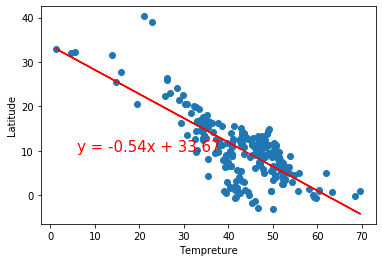

R square is  -0.7541466136582646 yada yada yada-0.5435500772092686.


In [57]:
# Northern Hemisphere - Temperature (F) vs. Latitude

y_values = merged500Df_northern['Temperature'].astype('float')
x_values = merged500Df_northern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()
print(f"R square is  {rvalue} yada yada yada{slope}.")

R squard: 0.47929814547526417


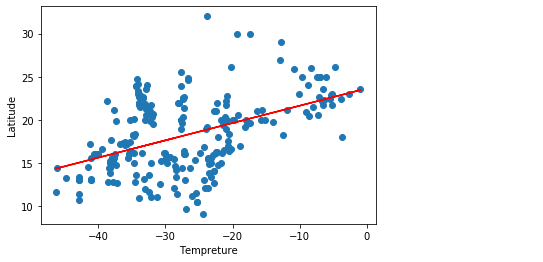

In [46]:
# Southern Hemisphere - Temperature (F) vs. Latitude

y_values = merged500Df_southern['Temperature'].astype('float')
x_values = merged500Df_southern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

R squard: 0.13924444405585623


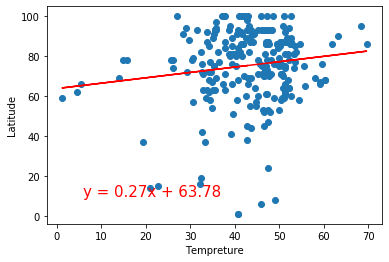

In [43]:
#Northern Hemisphere - Humidity (%) vs. Latitude
y_values = merged500Df_northern['Humidity'].astype('float')
x_values = merged500Df_northern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

R squard: 0.47929814547526417


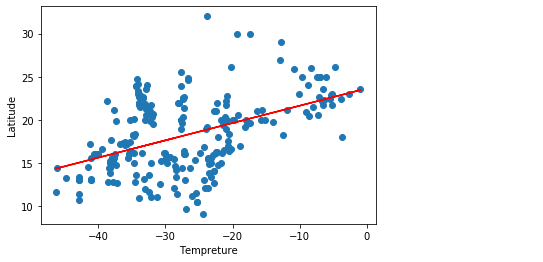

In [44]:
# Southern Hemisphere - Temperature (F) vs. Latitude

y_values = merged500Df_southern['Temperature'].astype('float')
x_values = merged500Df_southern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

R squard: 0.10577300957508229


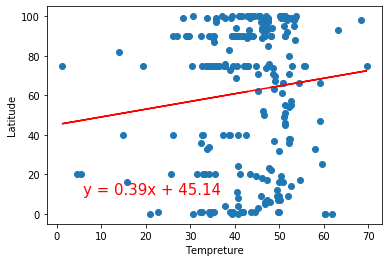

In [47]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude

y_values = merged500Df_northern['Cloudiness'].astype('float')
x_values = merged500Df_northern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

R squard: 0.044363368606369635


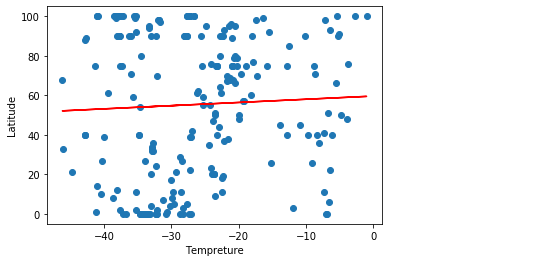

In [48]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude

y_values = merged500Df_southern['Cloudiness'].astype('float')
x_values = merged500Df_southern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

R squard: -0.21179703421821938


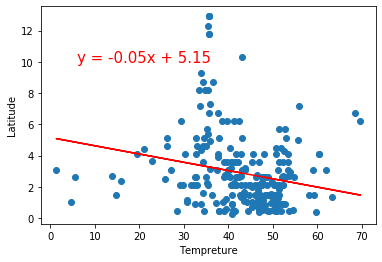

In [49]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude

y_values = merged500Df_northern['Wind Speed (mph)'].astype('float')
x_values = merged500Df_northern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

R squard: -0.29162138068492144


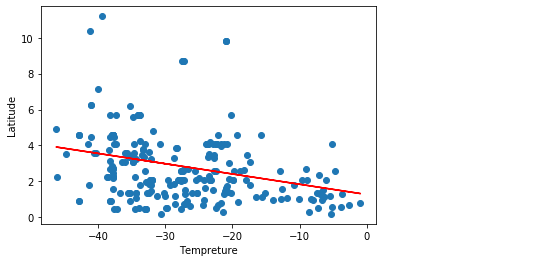

In [50]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude

y_values = merged500Df_southern['Wind Speed (mph)'].astype('float')
x_values = merged500Df_southern['latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Tempreture')
plt.ylabel('Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()